In [1]:
import os
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import cv2
from scipy.stats import skew, kurtosis, entropy
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LSTM,InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import callbacks
from skimage.feature import graycomatrix, graycoprops
from PIL import Image
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [2]:
 def load_images(path):
    X = []
    y = []
    for class_folder in os.listdir(path):
        class_path = os.path.join(path, class_folder)
        for image_file in os.listdir(class_path):
            # Define the GLCM properties
            distances = [1]
            angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
            levels = 256
            symmetric = True
            normed = True
            image = plt.imread(os.path.join(class_path, image_file))
            # Load the image as a grayscale array
            imag = np.array(Image.open(os.path.join(class_path, image_file)).convert('L'))
            # Split the image into its three color channels (BGR order)
            b, g, r = cv2.split(image)
            # Compute the GLCM for each angle
            glcm_0 = graycomatrix(imag, distances, angles=[0], levels=levels, symmetric=symmetric, normed=normed)
            glcm_45 = graycomatrix(imag, distances, angles=[np.pi/4], levels=levels, symmetric=symmetric, normed=normed)
            glcm_90 = graycomatrix(imag, distances, angles=[np.pi/2], levels=levels, symmetric=symmetric, normed=normed)
            glcm_135 = graycomatrix(imag, distances, angles=[3*np.pi/4], levels=levels, symmetric=symmetric, normed=normed)

            # Compute the features for each GLCM
            f19 = graycoprops(glcm_0, 'ASM')[0, 0]
            f20 = graycoprops(glcm_0, 'contrast')[0, 0]
            f21 = graycoprops(glcm_0, 'correlation')[0, 0]
            f22 = graycoprops(glcm_0, 'dissimilarity')[0, 0]

            f23 = graycoprops(glcm_45, 'ASM')[0, 0]
            f24 = graycoprops(glcm_45, 'contrast')[0, 0]
            f25 = graycoprops(glcm_45, 'correlation')[0, 0]
            f26 = graycoprops(glcm_45, 'dissimilarity')[0, 0]

            f27 = graycoprops(glcm_90, 'ASM')[0, 0]
            f28 = graycoprops(glcm_90, 'contrast')[0, 0]
            f29 = graycoprops(glcm_90, 'correlation')[0, 0]
            f30 = graycoprops(glcm_90, 'dissimilarity')[0, 0]

            f31 = graycoprops(glcm_135, 'ASM')[0, 0]
            f32 = graycoprops(glcm_135, 'contrast')[0, 0]
            f33 = graycoprops(glcm_135, 'correlation')[0, 0]
            f34 = graycoprops(glcm_135, 'dissimilarity')[0, 0]

            # Calculate the mean of each color channel
            mean_b = np.mean(b)
            mean_g = np.mean(g)
            mean_r = np.mean(r)

            # Calculate the standard deviation of each color channel
            std_b = np.std(b)
            std_g = np.std(g)
            std_r = np.std(r)

            # Calculate the skewness of each color channel
            skew_b = skew(np.ravel(b))
            skew_g = skew(np.ravel(g))
            skew_r = skew(np.ravel(r))

            # Calculate the kurtosis of each color channel
            kurt_b = kurtosis(np.ravel(b))
            kurt_g = kurtosis(np.ravel(g))
            kurt_r = kurtosis(np.ravel(r))

            # Calculate the entropy of each color channel
            hist_b = np.histogram(b, bins=np.arange(256))[0]
            hist_g = np.histogram(g, bins=np.arange(256))[0]
            hist_r = np.histogram(r, bins=np.arange(256))[0]
            entropy_b = entropy(hist_b)
            entropy_g = entropy(hist_g)
            entropy_r = entropy(hist_r)

            # Calculate the range of each color channel
            range_b = np.max(b) - np.min(b)
            range_g = np.max(g) - np.min(g)
            range_r = np.max(r) - np.min(r)

            
            
            features=[f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,mean_b,mean_r,mean_g,range_b,range_r,range_g,entropy_b,entropy_r,entropy_g,kurt_r,kurt_g,kurt_b,skew_r,skew_b,skew_g,std_r,std_g,std_b]
            X.append(features)
            y.append(class_folder)
    return np.array(X), np.array(y)

In [3]:
PATH = r"train"

In [4]:
#Load the training data
X, y = load_images(PATH)

In [5]:
df=pd.DataFrame(X)

In [6]:
df['class']=y

In [7]:
df.dtypes

0        float64
1        float64
2        float64
3        float64
4        float64
5        float64
6        float64
7        float64
8        float64
9        float64
10       float64
11       float64
12       float64
13       float64
14       float64
15       float64
16       float64
17       float64
18       float64
19       float64
20       float64
21       float64
22       float64
23       float64
24       float64
25       float64
26       float64
27       float64
28       float64
29       float64
30       float64
31       float64
32       float64
33       float64
class     object
dtype: object

In [8]:
from sklearn.preprocessing import LabelEncoder

# Creating a LabelEncoder object
le = LabelEncoder()

# Encoding the target variable
df['class'] = le.fit_transform(df['class'])


In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,class
0,0.001422,14.739798,0.982452,2.858586,0.000885,46.599531,0.944773,5.057035,0.000989,38.137374,...,-0.151723,-0.096586,-0.028965,-0.633367,-0.567567,-0.601981,20.803936,20.476244,20.747587,0
1,0.000820,66.511818,0.903173,5.974242,0.000525,215.878788,0.685655,10.688297,0.000595,158.369798,...,3.776072,3.492125,3.230851,0.790220,0.761258,0.758262,18.432288,18.759424,18.149156,0
2,0.000691,54.853737,0.953390,5.412525,0.000514,104.787675,0.911169,7.597388,0.000604,79.338788,...,0.332744,0.218779,0.117652,0.784120,0.662771,0.730516,23.218400,24.261796,24.859324,0
3,0.001576,47.071818,0.967891,4.418081,0.000935,160.980716,0.889289,8.525048,0.001153,119.580707,...,1.809876,1.254689,0.744029,-0.958405,0.408828,-0.135613,25.422051,26.953218,29.267480,0
4,0.001057,61.005354,0.912566,5.483535,0.000898,96.729109,0.861788,6.769513,0.001108,61.917475,...,6.853926,6.938431,7.068352,1.836029,1.944856,1.886836,17.935729,18.679585,19.222230,0


In [10]:
X=df.drop('class',axis=1)

In [11]:
y=df['class']

In [12]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int32

In [13]:
# Split the training data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=52)

In [14]:
df['class'].value_counts()

0    351
1    349
Name: class, dtype: int64

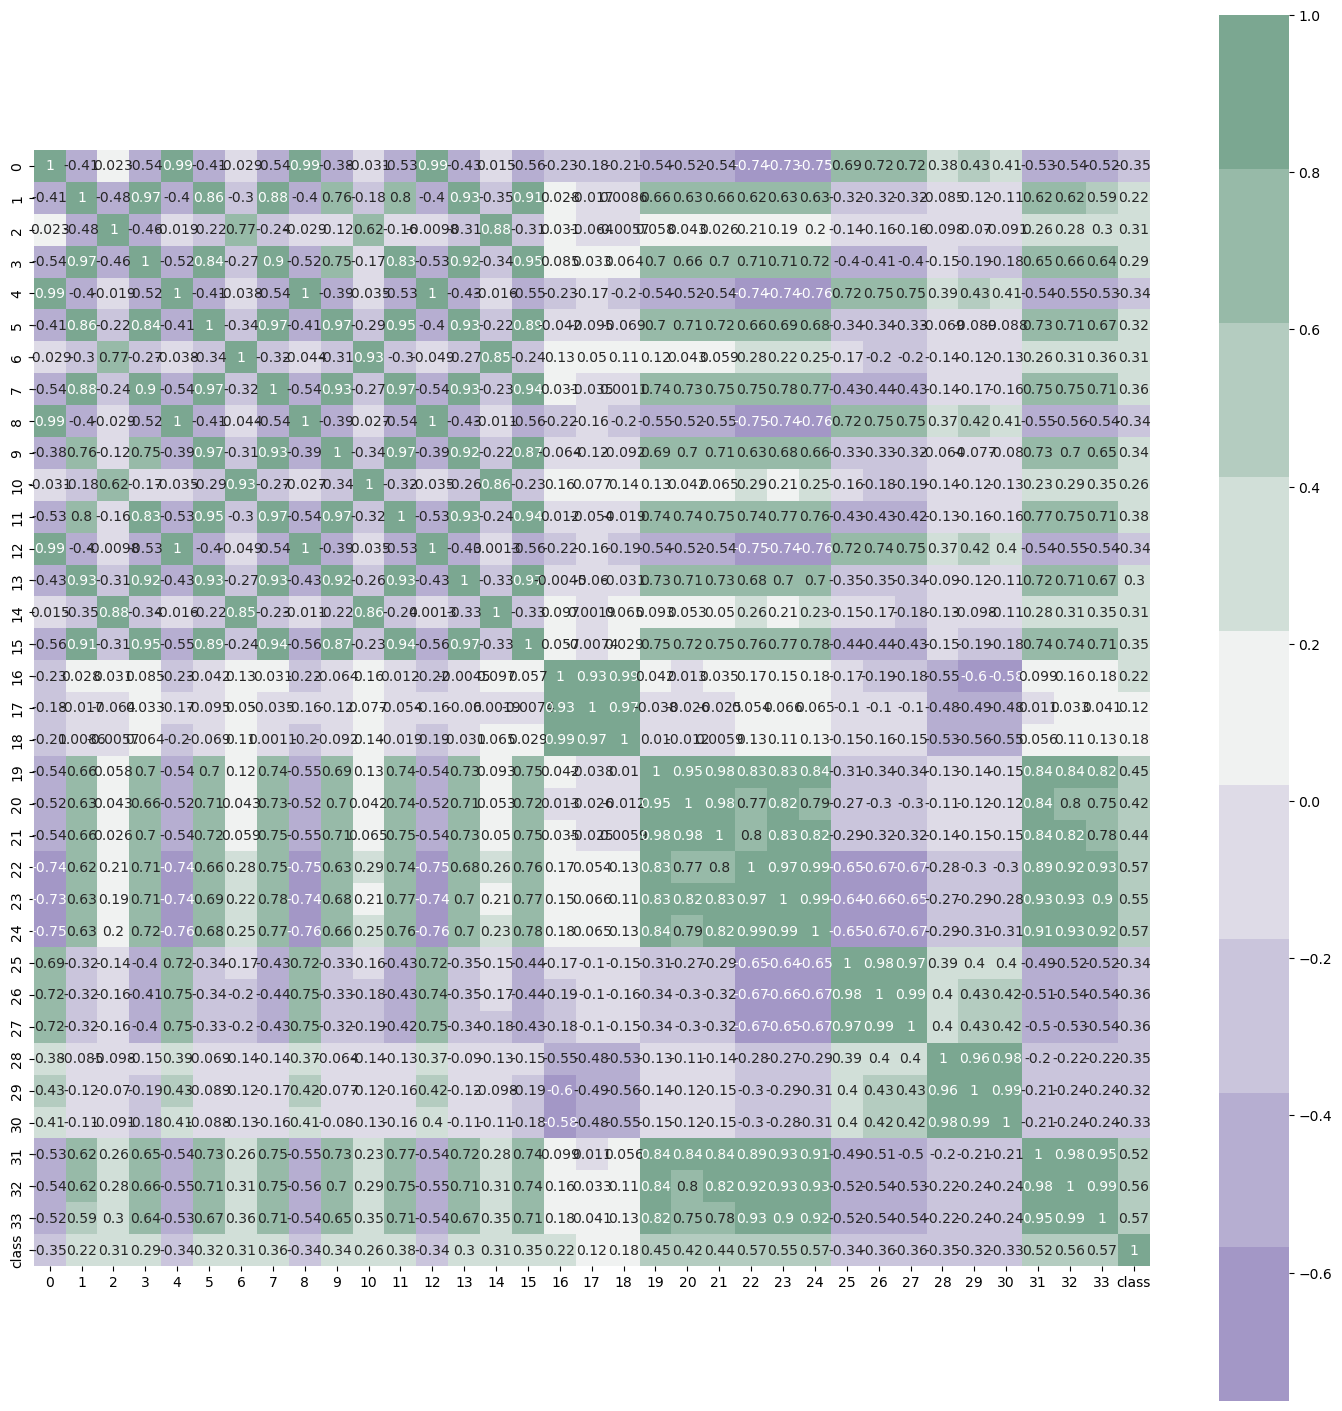

In [15]:
import seaborn as sns
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df.corr()
plt.subplots(figsize=(18,18))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

In [16]:
def load_test_images(path):
    X=[]
    for image_file in os.listdir(path):
            # Define the GLCM properties
            distances = [1]
            angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
            levels = 256
            symmetric = True
            normed = True
            image = plt.imread(os.path.join(path, image_file))
            # Load the image as a grayscale array
            imag = np.array(Image.open(os.path.join(path, image_file)).convert('L'))
            # Split the image into its three color channels (BGR order)
            b, g, r = cv2.split(image)
            # Compute the GLCM for each angle
            glcm_0 = graycomatrix(imag, distances, angles=[0], levels=levels, symmetric=symmetric, normed=normed)
            glcm_45 = graycomatrix(imag, distances, angles=[np.pi/4], levels=levels, symmetric=symmetric, normed=normed)
            glcm_90 = graycomatrix(imag, distances, angles=[np.pi/2], levels=levels, symmetric=symmetric, normed=normed)
            glcm_135 = graycomatrix(imag, distances, angles=[3*np.pi/4], levels=levels, symmetric=symmetric, normed=normed)

            # Compute the features for each GLCM
            f19 = graycoprops(glcm_0, 'ASM')[0, 0]
            f20 = graycoprops(glcm_0, 'contrast')[0, 0]
            f21 = graycoprops(glcm_0, 'correlation')[0, 0]
            f22 = graycoprops(glcm_0, 'dissimilarity')[0, 0]

            f23 = graycoprops(glcm_45, 'ASM')[0, 0]
            f24 = graycoprops(glcm_45, 'contrast')[0, 0]
            f25 = graycoprops(glcm_45, 'correlation')[0, 0]
            f26 = graycoprops(glcm_45, 'dissimilarity')[0, 0]

            f27 = graycoprops(glcm_90, 'ASM')[0, 0]
            f28 = graycoprops(glcm_90, 'contrast')[0, 0]
            f29 = graycoprops(glcm_90, 'correlation')[0, 0]
            f30 = graycoprops(glcm_90, 'dissimilarity')[0, 0]

            f31 = graycoprops(glcm_135, 'ASM')[0, 0]
            f32 = graycoprops(glcm_135, 'contrast')[0, 0]
            f33 = graycoprops(glcm_135, 'correlation')[0, 0]
            f34 = graycoprops(glcm_135, 'dissimilarity')[0, 0]

            
            # Calculate the mean of each color channel
            mean_b = np.mean(b)
            mean_g = np.mean(g)
            mean_r = np.mean(r)

            # Calculate the standard deviation of each color channel
            std_b = np.std(b)
            std_g = np.std(g)
            std_r = np.std(r)

            # Calculate the skewness of each color channel
            skew_b = skew(np.ravel(b))
            skew_g = skew(np.ravel(g))
            skew_r = skew(np.ravel(r))

            # Calculate the kurtosis of each color channel
            kurt_b = kurtosis(np.ravel(b))
            kurt_g = kurtosis(np.ravel(g))
            kurt_r = kurtosis(np.ravel(r))

            # Calculate the entropy of each color channel
            hist_b = np.histogram(b, bins=np.arange(256))[0]
            hist_g = np.histogram(g, bins=np.arange(256))[0]
            hist_r = np.histogram(r, bins=np.arange(256))[0]
            entropy_b = entropy(hist_b)
            entropy_g = entropy(hist_g)
            entropy_r = entropy(hist_r)

            # Calculate the range of each color channel
            range_b = np.max(b) - np.min(b)
            range_g = np.max(g) - np.min(g)
            range_r = np.max(r) - np.min(r)

            
            
            features=[image_file,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,mean_b,mean_r,mean_g,range_b,range_r,range_g,entropy_b,entropy_r,entropy_g,kurt_r,kurt_g,kurt_b,skew_r,skew_b,skew_g,std_r,std_g,std_b]
            X.append(features)
    return np.array(X)

    

In [17]:
X_test=load_test_images(r"test")
df_test=pd.DataFrame(X_test)
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1.jpg,0.00044985715743291497,129.25262626262628,0.9242336891954449,8.055050505050506,0.0003888731538662128,156.78155290276504,0.9085764259129627,9.130292827262524,0.00044165901438628725,...,4.712253463883794,0.5168159518432258,0.593164923428303,0.6306271383116053,0.7950417242568284,0.8921376388105714,0.8582984842235929,28.82387513416612,29.69595376545431,28.676161056877888
1,10.jpg,0.0002674778083868993,163.1130303030303,0.944484682737172,9.351212121212122,0.00017271048210995587,560.1660034690337,0.8088653292890415,17.724823997551272,0.00019019997959391903,...,5.026319938521532,0.2842518168748338,0.22380032329901267,0.14542253145386264,-0.42030576039445383,-0.303100413060304,-0.3452236592160948,37.72059628584893,38.54844013394057,38.40494267135416
2,100.jpg,0.0014842822161003982,33.88878787878787,0.9607748619953731,4.245353535353535,0.0010942893672856295,75.93265993265993,0.9119929297690954,6.301397816549332,0.0015937608407305382,...,4.1796866911324635,0.5872415066244057,0.7977824574952037,0.8381033013398786,-1.158019816913409,-1.2908018581607321,-1.258299242669866,20.061465325344507,21.132711870462817,20.64935012149293
3,101.jpg,0.00033870523415977964,133.14020202020203,0.9359453778542399,8.563636363636363,0.00030366043265159936,175.99387817569638,0.9153885220124091,9.76328946025916,0.0004217171717171717,...,4.811462930587599,-0.4143640375505875,-0.6305872503035319,-0.8066461442841786,-0.08332951671337936,0.23842478683019908,0.12686373941388673,27.632821892814352,31.602579083992495,35.94629440206598
4,102.jpg,0.00020395367819610246,335.48161616161616,0.9128026085751512,12.954343434343436,0.00014917301186791315,822.600142842567,0.7860131900547225,20.689521477400266,0.00016769717375777983,...,5.10054799196932,-0.3785953754658742,-0.48345271937601453,-0.44902103403663896,0.18844321110742454,0.3584991758940851,0.24726262482690103,40.94165109714067,43.3945425221882,46.043296622201154


In [18]:
df_test1=df_test.drop(df_test.columns[0],axis=1)

In [19]:
df_test1.head()

,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
0,0.00044985715743291497,129.25262626262628,0.9242336891954449,8.055050505050506,0.0003888731538662128,156.78155290276504,0.9085764259129627,9.130292827262524,0.00044165901438628725,117.91050505050505,...,4.712253463883794,0.5168159518432258,0.593164923428303,0.6306271383116053,0.7950417242568284,0.8921376388105714,0.8582984842235929,28.82387513416612,29.69595376545431,28.676161056877888
1,0.0002674778083868993,163.1130303030303,0.944484682737172,9.351212121212122,0.00017271048210995587,560.1660034690337,0.8088653292890415,17.724823997551272,0.00019019997959391903,442.9206060606061,...,5.026319938521532,0.2842518168748338,0.22380032329901267,0.14542253145386264,-0.42030576039445383,-0.303100413060304,-0.3452236592160948,37.72059628584893,38.54844013394057,38.40494267135416
2,0.0014842822161003982,33.88878787878787,0.9607748619953731,4.245353535353535,0.0010942893672856295,75.93265993265993,0.9119929297690954,6.301397816549332,0.0015937608407305382,37.60373737373738,...,4.1796866911324635,0.5872415066244057,0.7977824574952037,0.8381033013398786,-1.158019816913409,-1.2908018581607321,-1.258299242669866,20.061465325344507,21.132711870462817,20.64935012149293
3,0.00033870523415977964,133.14020202020203,0.9359453778542399,8.563636363636363,0.00030366043265159936,175.99387817569638,0.9153885220124091,9.76328946025916,0.0004217171717171717,85.81838383838384,...,4.811462930587599,-0.4143640375505875,-0.6305872503035319,-0.8066461442841786,-0.08332951671337936,0.23842478683019908,0.12686373941388673,27.632821892814352,31.602579083992495,35.94629440206598
4,0.00020395367819610246,335.48161616161616,0.9128026085751512,12.954343434343436,0.00014917301186791315,822.600142842567,0.7860131900547225,20.689521477400266,0.00016769717375777983,605.3809090909091,...,5.10054799196932,-0.3785953754658742,-0.48345271937601453,-0.44902103403663896,0.18844321110742454,0.3584991758940851,0.24726262482690103,40.94165109714067,43.3945425221882,46.043296622201154


In [20]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test_scaled=scaler.transform(df_test1)

In [21]:
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001, # minimium amount of change to count as an improvement
    patience=20, # how many epochs to wait before stopping
    restore_best_weights=True)
model = Sequential(
[InputLayer(input_shape=(X_train.shape[1],)),
Dense(128,activation='relu'),
Dense(1,activation='sigmoid')]
)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')
history=model.fit(X_train,y_train,epochs=350,batch_size=32,validation_split=0.2,callbacks=[early_stopping])


Epoch 1/350


C:\Users\vedpr\.conda\envs\Developer\lib\site-packages\keras\engine\data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


14/14 [==============================] - 1s 31ms/step - loss: 0.6100 - accuracy: 0.6228 - val_loss: 0.4761 - val_accuracy: 0.7500
Epoch 2/350
14/14 [==============================] - 0s 5ms/step - loss: 0.4365 - accuracy: 0.7879 - val_loss: 0.4062 - val_accuracy: 0.7857
Epoch 3/350
14/14 [==============================] - 0s 5ms/step - loss: 0.4028 - accuracy: 0.7969 - val_loss: 0.3795 - val_accuracy: 0.8482
Epoch 4/350
14/14 [==============================] - 0s 5ms/step - loss: 0.3879 - accuracy: 0.8170 - val_loss: 0.3587 - val_accuracy: 0.8661
Epoch 5/350
14/14 [==============================] - 0s 6ms/step - loss: 0.3727 - accuracy: 0.8326 - val_loss: 0.3460 - val_accuracy: 0.8571
Epoch 6/350
14/14 [==============================] - 0s 7ms/step - loss: 0.3621 - accuracy: 0.8393 - val_loss: 0.3356 - val_accuracy: 0.8571
Epoch 7/350
14/14 [==============================] - 0s 6ms/step - loss: 0.3533 - accuracy: 0.8527 - val_loss: 0.3277 - val_accuracy: 0.8661
Epoch 8/350
14/14 [=====

Epoch 59/350
14/14 [==============================] - 0s 6ms/step - loss: 0.1665 - accuracy: 0.9442 - val_loss: 0.1740 - val_accuracy: 0.9107
Epoch 60/350
14/14 [==============================] - 0s 7ms/step - loss: 0.1706 - accuracy: 0.9375 - val_loss: 0.1756 - val_accuracy: 0.9196
Epoch 61/350
14/14 [==============================] - 0s 6ms/step - loss: 0.1661 - accuracy: 0.9420 - val_loss: 0.1714 - val_accuracy: 0.9375
Epoch 62/350
14/14 [==============================] - 0s 7ms/step - loss: 0.1603 - accuracy: 0.9375 - val_loss: 0.1721 - val_accuracy: 0.9107
Epoch 63/350
14/14 [==============================] - 0s 7ms/step - loss: 0.1601 - accuracy: 0.9442 - val_loss: 0.1687 - val_accuracy: 0.9196
Epoch 64/350
14/14 [==============================] - 0s 6ms/step - loss: 0.1550 - accuracy: 0.9442 - val_loss: 0.1704 - val_accuracy: 0.9196
Epoch 65/350
14/14 [==============================] - 0s 6ms/step - loss: 0.1540 - accuracy: 0.9420 - val_loss: 0.1653 - val_accuracy: 0.9107
Epoch 

14/14 [==============================] - 0s 5ms/step - loss: 0.0864 - accuracy: 0.9754 - val_loss: 0.1188 - val_accuracy: 0.9464
Epoch 117/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0857 - accuracy: 0.9777 - val_loss: 0.1180 - val_accuracy: 0.9554
Epoch 118/350
14/14 [==============================] - 0s 6ms/step - loss: 0.0875 - accuracy: 0.9732 - val_loss: 0.1199 - val_accuracy: 0.9464
Epoch 119/350
14/14 [==============================] - 0s 7ms/step - loss: 0.0828 - accuracy: 0.9799 - val_loss: 0.1161 - val_accuracy: 0.9464
Epoch 120/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0822 - accuracy: 0.9777 - val_loss: 0.1173 - val_accuracy: 0.9554
Epoch 121/350
14/14 [==============================] - 0s 6ms/step - loss: 0.0811 - accuracy: 0.9799 - val_loss: 0.1172 - val_accuracy: 0.9554
Epoch 122/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0809 - accuracy: 0.9799 - val_loss: 0.1163 - val_accuracy: 0.9464
Epoch 123/350

14/14 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9911 - val_loss: 0.1035 - val_accuracy: 0.9643
Epoch 174/350
14/14 [==============================] - 0s 6ms/step - loss: 0.0461 - accuracy: 0.9911 - val_loss: 0.1022 - val_accuracy: 0.9643
Epoch 175/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0457 - accuracy: 0.9911 - val_loss: 0.1020 - val_accuracy: 0.9643
Epoch 176/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0448 - accuracy: 0.9888 - val_loss: 0.1041 - val_accuracy: 0.9643
Epoch 177/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0443 - accuracy: 0.9911 - val_loss: 0.1012 - val_accuracy: 0.9643
Epoch 178/350
14/14 [==============================] - 0s 6ms/step - loss: 0.0446 - accuracy: 0.9911 - val_loss: 0.1005 - val_accuracy: 0.9732
Epoch 179/350
14/14 [==============================] - 0s 5ms/step - loss: 0.0436 - accuracy: 0.9933 - val_loss: 0.1019 - val_accuracy: 0.9643
Epoch 180/350

In [22]:
y_predval=model.predict(X_val)

5/5 [==============================] - 0s 2ms/step


In [23]:
y_pred1=[]
for i in y_predval:
    if i>0.5:
        y_pred1.append(1)
    else:
        y_pred1.append(0)
        
        

In [24]:
print(classification_report(y_val, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        72
           1       0.93      0.97      0.95        68

    accuracy                           0.95       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.95      0.95      0.95       140



In [25]:
X_test.shape

(300, 35)

In [26]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('val_accuracy', val_accuracy*100))


val_accuracy: 93.38%


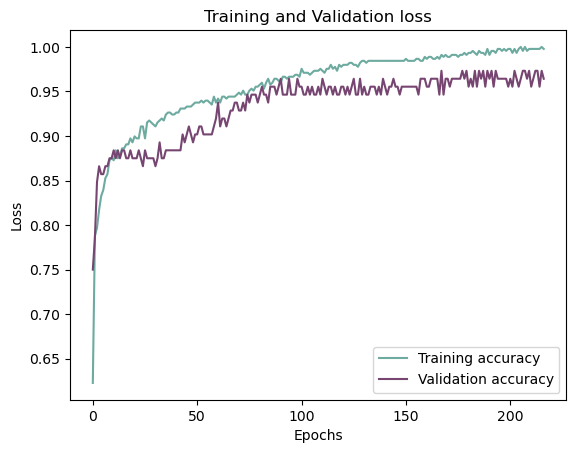

In [27]:
history_df = pd.DataFrame(history.history)

plt.plot(history_df.loc[:, ['accuracy']], "#6daa9f", label='Training accuracy')
plt.plot(history_df.loc[:, ['val_accuracy']],"#774571", label='Validation accuracy')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc="best")

plt.show()

In [28]:
def label(x):
    if y_pred > 0.5:
        return 1
    else:
        return 0

In [29]:
# Predicting the test set results
y_pred = model.predict(X_test_scaled)


10/10 [==============================] - 0s 1ms/step


In [30]:
y_pred_test=[]
for i in y_pred:
    if i>0.5:
        y_pred_test.append('Raveling')
    else:
        y_pred_test.append('Non_raveling')
        
        

In [31]:
df_result=pd.DataFrame()

In [32]:
df_result['filename']=df_test[df_test.columns[0]]

In [33]:
df_result['class']=y_pred_test

In [34]:
df_result.head()

,filename,class
0,1.jpg,Non_raveling
1,10.jpg,Raveling
2,100.jpg,Non_raveling
3,101.jpg,Raveling
4,102.jpg,Raveling


In [35]:
df_result.to_csv("submission.csv",index=False)